In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Input
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.python.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix, reshape to make it a column vector, -1 means "unspecified",  1 means "one column"
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix, reshape to make it a column vector

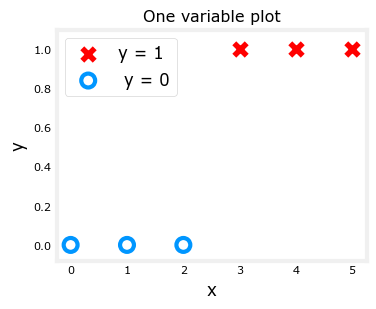

In [4]:
pos = Y_train == 1 # Indexes of positive examples
neg = Y_train == 0 # Indexes of negative examples

fig, ax = plt.subplots(1, 1, figsize = (4,3))
ax.scatter(X_train[pos], Y_train[pos], marker = 'x', s = 80, c = 'red', label = 'y = 1') # Positive examples, s means size
ax.scatter(X_train[neg], Y_train[neg], marker = 'o', s = 100, label = ' y = 0', facecolors = 'none', edgecolors = dlc["dlblue"], lw = 3) # Negative examples, facecolors = 'none' means no fill, edgecolors = dlc["dblue"] means blue edge, lw means line width
ax.set_ylim(-0.08, 1.1)
ax.set_xlabel("x", fontsize = 12)
ax.set_ylabel("y", fontsize = 12)
ax.set_title("One variable plot")
ax.legend(fontsize = 12)
plt.show()

Logistic Neuron

In [7]:
model = Sequential([
    Dense(1, input_dim = 1, activation = "sigmoid", name = "L1")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
logistic_layer = model.get_layer("L1") # Get the logistic layer
w, b = logistic_layer.get_weights() # Get the weights and bias
print(w,b) 
print(w.shape, b.shape) 

[[-1.25]] [0.]
(1, 1) (1,)


In [9]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [12]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

[[0.01]]
